# Implement Linear Regression (Gradient Descent) with 1 variable

In [1]:
class LinearRegression:
    def __init__(self, lr=0.01, epochs = 1000):
        self.lr = lr
        self.epochs = epochs     
        self.w0 = 1 
        self.w1 = 1 
        
    def cost_function(self, y_test): 
        self.loss = np.sum((y_test.values.reshape(-1,1) - self.y_pred)**2) / len(y_test)
        return self.loss 
    
    def update_weights(self, x_train, y_train):
        self.n = len(y_train)
        self.w0 -= self.lr * (-2 * np.sum(y_train.values.reshape(-1,1) - (self.w0 + self.w1 * x_train))/self.n)
        self.w1 -= self.lr * (-2 * np.sum(np.dot(x_train.T, (y_train.values.reshape(-1,1) - (self.w0 + self.w1 * x_train))))/self.n)
        pass

    def fit(self, x_train, y_train):
        for i in range(self.epochs):
            self.update_weights(x_train, y_train)
        return (self.w0, self.w1)
        
    def predict(self, x_test):
        self.y_pred = self.w0 + self.w1 * x_test
        return self.y_pred

coefficients w0 and w1: (214.28663081954846, 79.50787641588106)
MSE: 2418.0846604707795


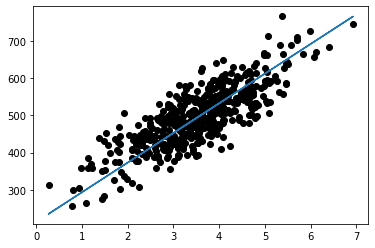

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# test on dataset from the first week
data = pd.read_csv('../../week1-tishkhanyan/week1/Ecommerce.csv') 
y = data['Yearly Amount Spent']
X = data['Length of Membership'].values.reshape(-1,1)

my_lm = LinearRegression()
my_model = my_lm.fit(X, y)
predictions = my_lm.predict(X)

print("coefficients w0 and w1:", my_model)
print("MSE:", my_lm.cost_function(y))

plt.plot(X, y, 'o', color='black');
plt.plot(X, my_model[0] + my_model[1] * X);

In [3]:
# compare with the sckitlearn LinearRegression

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

print("coefficients w0 and w1:", (model.intercept_, model.coef_))

print("MSE:", mean_squared_error(predictions, y))

coefficients w0 and w1: (272.3997860580282, array([64.21868432]))
MSE: 2168.406716917079


In [ ]:
# changing lr = 0.05 in my fit will give the sklearn's answer

# Implement Ridge Regression (Gradient Descent) for unlimited number of variables

In [4]:
# RidgeRegression without intercept; works for small lr's, 

class RidgeRegression_1:
    def __init__(self, lr=0.000001, lmb=0.5):
        self.lr = lr
        self.lmb = lmb
        self.epochs = 5000
    
    def cost_function(self, y_test): 
        self.loss = np.sum((y_test.values.reshape(-1,1) - self.y_pred)**2)/len(y_test)
        return self.loss 
    
    def update_weights(self, x_train, y_train):
        self.matrix1 = np.dot(x_train.T, x_train)
        self.matrix2 = np.dot(x_train.T, y_train.values.reshape(-1,1))
        return (self.matrix1, self.matrix2)
    
    def fit(self, x_train, y_train):
        self.betas = np.zeros(((x_train.shape)[1] , 1))
        for i in range(self.epochs):
            self.betas -= self.lr * np.dot(self.update_weights(x_train, y_train)[0], self.betas) - self.lr * self.update_weights(x_train, y_train)[1] +self.lr * self.lmb * self.betas
        return self.betas
        
    def predict(self, x_test):
        self.y_pred = np.dot(x_test, self.betas)
        return self.y_pred

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# test on dataset from the first week
data = pd.read_csv('../../week1-tishkhanyan/week1/Ecommerce.csv') 
y = data['Yearly Amount Spent']
X = data[['Length of Membership', 'Avg Session Length', 'Time on App', 'Time on Website']]

my_rr = RidgeRegression_1()
my_model = my_rr.fit(X, y)
predictions = my_rr.predict(X)

print("betas:", my_model.T, '\n')
print("MSE:", my_rr.cost_function(y))

betas: [[ 55.8303602   11.82438353  31.88672448 -12.75510571]] 

MSE: 546.3814525376164


In [6]:
# compare with the sklearn's Ridge

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

rr = Ridge(alpha=0.5, fit_intercept = False)
rr.fit(X, y)
predictions = rr.predict(X)

print("betas:", rr.coef_, '\n')

print("MSE:", mean_squared_error(predictions, y))

betas: [ 60.35834054  11.86783612  34.71277074 -14.14471448] 

MSE: 514.6029026481225


In [7]:
# RidgeRegression with intercept fitting; works for only very small lr's and needs very big number of steps 

class RidgeRegression_2:
    def __init__(self, x_train, y_train, x_test, lr=0.000001, lmb=0.5):
        self.x_train = np.c_[np.ones((len(x_train), 1)), x_train]
        self.y_train = y_train.values.reshape(-1,1)
        self.x_test = np.c_[np.ones((len(x_test), 1)), x_test]
        self.lr = lr
        self.lmb = lmb
        self.epochs = 100000
        
    def update_weights(self):
        self.matrix1 = np.dot(self.x_train.T, self.x_train)
        self.matrix2 = np.dot(self.x_train.T, self.y_train)
        return self.matrix1, self.matrix2
    
    def fit(self):
        self.betas = np.zeros(((self.x_train.shape)[1] , 1))
        for i in range(self.epochs):
            self.betas -= self.lr * np.dot(self.update_weights()[0], self.betas) - self.lr * self.update_weights()[1] +self.lr * self.lmb * self.betas
        return self.betas
        
    def predict(self):
        self.y_pred = np.dot(self.x_test, self.betas)
        return self.y_pred

In [8]:
# test on dataset from the first week
data = pd.read_csv('../../week1-tishkhanyan/week1/Ecommerce.csv') 
y = data['Yearly Amount Spent']
X = data[['Length of Membership', 'Avg Session Length', 'Time on App', 'Time on Website']]

my_rr = RidgeRegression_2(X, y, X)
my_model = my_rr.fit()
predictions = my_rr.predict()

print("betas:", my_model.T, '\n')
print("MSE:", mean_squared_error(predictions, y))

betas: [[-18.95829522  60.37937581  12.11754458  34.7845311  -13.88141131]] 

MSE: 499.73412923774004


In [9]:
# compare with the sklearn's Ridge

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

rr = Ridge(alpha=0.5, fit_intercept = True)
rr.fit(X, y)
predictions = rr.predict(X)

print("betas:", (rr.intercept_, rr.coef_), '\n')

print("MSE:", mean_squared_error(predictions, y))

betas: (-1050.1096535832055, array([61.51806607, 25.71062171, 38.67111087,  0.43579396])) 

MSE: 98.47675025448858
